# Music genre prediction

## Вводная информация

### Описание задачи

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### Этапы работы

* загрузка и ознакомление с данными,
* предварительная обработка,
* полноценный разведочный анализ,
* разработка новых синтетических признаков,
* проверка на мультиколлинеарность,
* отбор финального набора обучающих признаков,
* выбор и обучение моделей,
* итоговая оценка качества предсказания лучшей модели,
* анализ важности ее признаков.

### Данные

* train.csv - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* test.csv - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение * 'music_genre' для каждого трека из этого датасета.
* sample_submit.csv - файл предсказаний в правильном формате.
* instance_id - идентификатор трека в тестовом наборе.
* music_genre - Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

### Описание полей данных

* instance_id - уникальный идентификатор трека
* track_name - название трека
* acousticness - акустичность 
* danceability - танцевальность
* duration_ms -продолжительность в милисекундах
* energy - энергичность
* instrumentalness - инструментальность
* key - тональность
* liveness - привлекательность
* loudness - громкость
* mode - наклонение
* speechiness - выразительность
* tempo - темп
* obtained_date - дата загрузки в сервис
* valence - привлекательность произведения для пользователей сервиса
* music_genre - музыкальный жанр

## Предподготовка данных

### Загрузка и изучение данных

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
train = pd.read_csv('kaggle_music_genre_train.csv')
test = pd.read_csv('kaggle_music_genre_test.csv')
submit = pd.read_csv('sample_submit.csv')

In [5]:
train.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


In [6]:
test.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121


In [7]:
submit.head()

,instance_id,music_genre
0,48564,Hip-Hop
1,72394,Alternative
2,88081,Rap
3,78331,Anime
4,72636,Anime


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


In [11]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instance_id  5099 non-null   int64 
 1   music_genre  5099 non-null   object
dtypes: int64(1), object(1)
memory usage: 79.8+ KB


### Работа с пропусками и дибликатами

In [17]:
# отобразим строки где имеюся пропуски в стобцax 'key', 'mode' и 'tempo'
train[train['key'].isnull()].head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
26,87453.0,"Serenade in B flat, K.361 ""Gran partita"": 3. A...",0.9910,0.154,-1.0,0.0384,0.902000,NaN,0.109,-26.909,Major,0.0405,68.199,4-Apr,0.0393,Classical
49,87796.0,Star67,0.7470,0.478,294973.0,0.3950,0.000005,NaN,0.264,-7.917,Major,0.2130,74.515,3-Apr,0.1700,Hip-Hop
60,69398.0,Sleep On The Floor,0.2490,0.389,211851.0,0.4310,0.000000,NaN,0.130,-8.061,Major,0.0344,142.140,4-Apr,0.2750,Rock
75,20134.0,Rogue,0.0145,0.580,201694.0,0.7200,0.598000,NaN,0.281,-5.541,Major,0.0638,143.816,4-Apr,0.1600,Electronic
107,69505.0,Party Song,0.1560,0.563,191760.0,0.8970,0.000000,NaN,0.352,-4.996,Major,0.2130,157.803,4-Apr,0.7790,Country


In [18]:
train[train['mode'].isnull()].head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
96,63867.0,"Clarinet Concerto No. 1 in F Minor, Op. 73, J....",0.973000,0.416,401000.0,0.0735,0.710000,F,0.0781,-20.723,NaN,0.0411,112.006,4-Apr,0.222,Classical
129,75913.0,"Concerto for Viola d'amore, Lute, Strings and ...",0.926000,0.495,-1.0,0.1110,0.120000,C#,0.0772,-18.591,NaN,0.0506,78.772,4-Apr,0.436,Classical
131,64391.0,She Keeps The Home Fires Burning,0.526000,0.731,236173.0,0.6080,0.000000,G,0.1260,-10.690,NaN,0.0267,126.263,4-Apr,0.745,Country
292,37649.0,Ven - Continuous Mix,0.000216,0.555,50472.0,0.9530,0.059400,E,0.8180,-4.411,NaN,0.1090,114.885,4-Apr,0.303,Electronic
326,43825.0,Wicked As It Seems,0.287000,0.689,285263.0,0.6200,0.000002,G,0.0368,-10.601,NaN,0.0339,110.860,4-Apr,0.962,Blues


In [19]:
train[train['tempo'].isnull()].head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
63,45966.0,Back Door Man,0.287000,0.476,212427.0,0.612,0.000252,A,0.0877,-7.010,Major,0.0335,NaN,4-Apr,0.909,Rock
85,90217.0,familia,0.000059,0.489,269000.0,0.947,0.000000,C#,0.1130,-3.925,Minor,0.0419,NaN,4-Apr,0.517,Anime
114,79170.0,Poor Johnny,0.348000,0.698,362267.0,0.800,0.000087,B,0.4430,-3.091,Minor,0.0284,NaN,4-Apr,0.654,Blues
138,39716.0,Set Free (feat. Yael),0.008340,0.776,191210.0,0.783,0.044900,C,0.0377,-3.595,Major,0.0374,NaN,4-Apr,0.943,Electronic
145,48590.0,Running Away,0.001100,0.608,178440.0,0.801,0.000008,A,0.2230,-5.452,Minor,0.0376,NaN,3-Apr,0.544,Alternative


In [24]:
# проверим есть ли дубликаты в тренировочном и тестовом датасетах
train.duplicated().sum()

0

In [26]:
test.duplicated().sum()

0

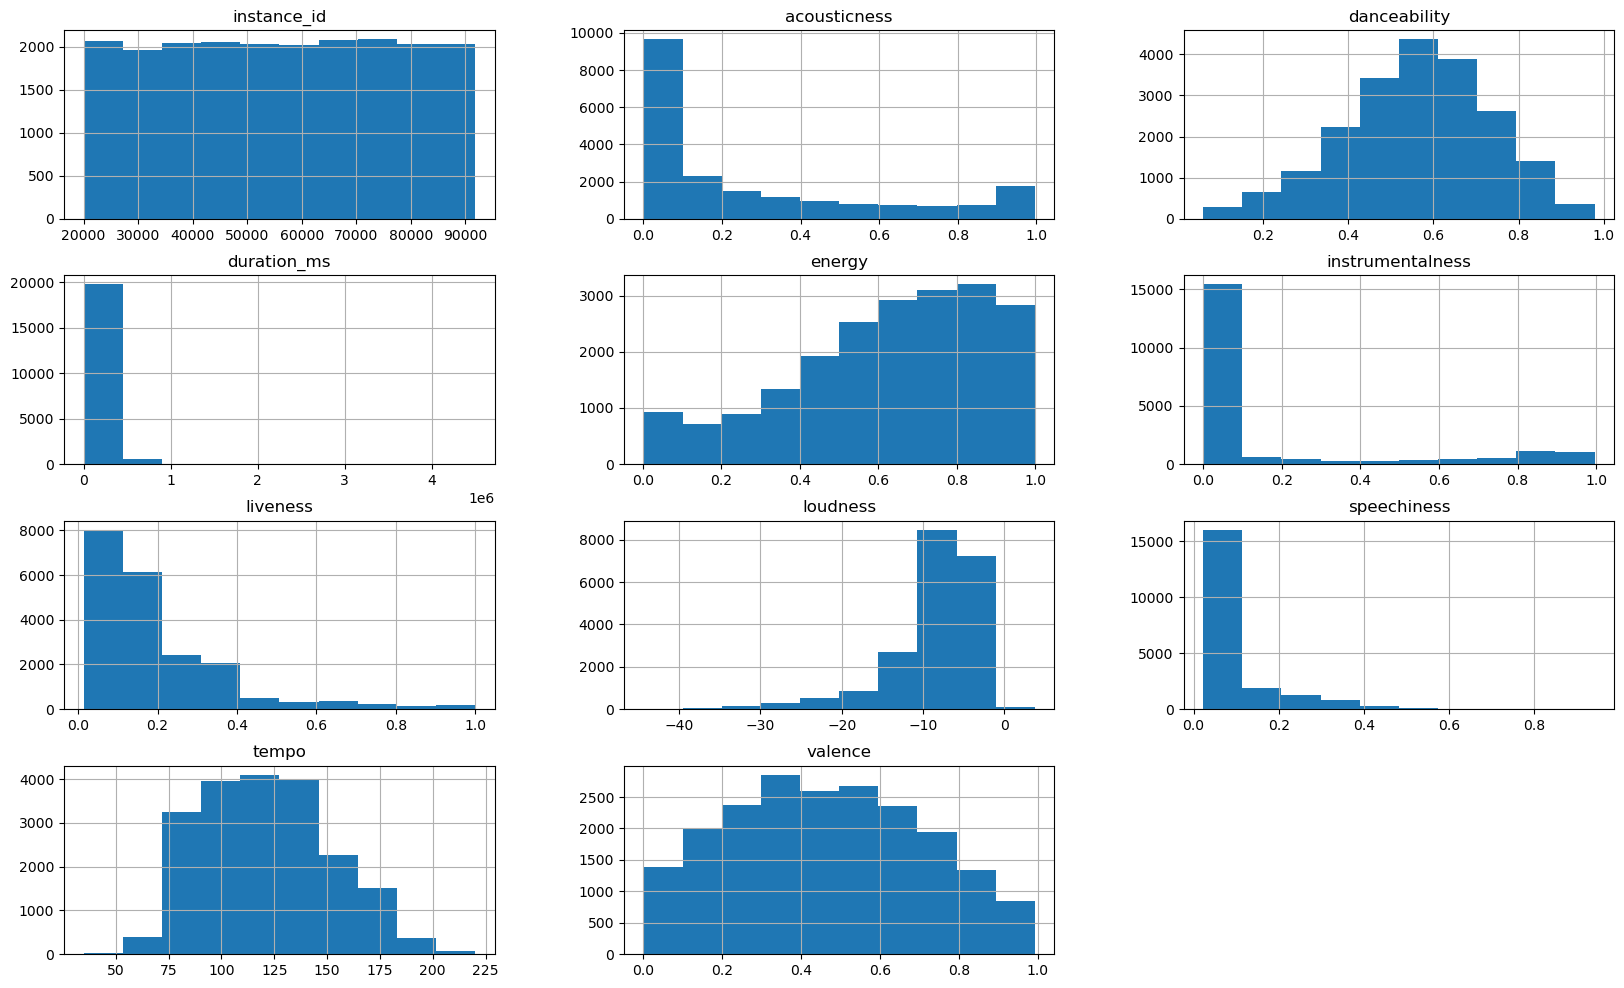

In [27]:
# построим гистограммы распределения тренировочного датасета
train.hist(figsize=(20, 12));

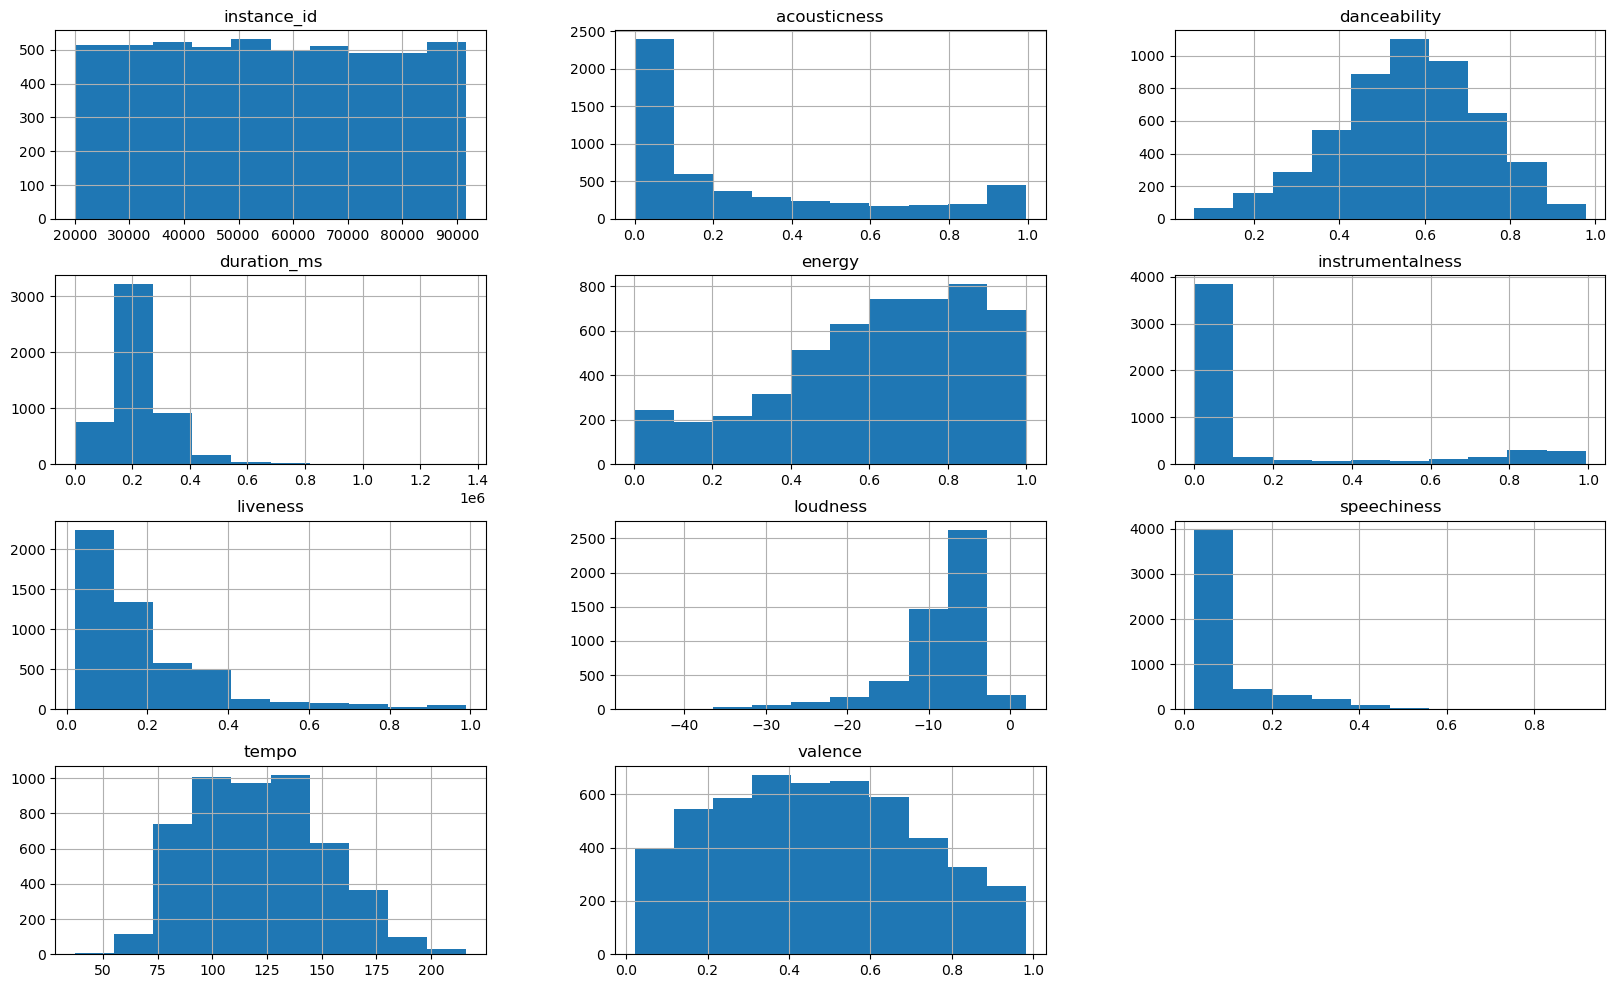

In [28]:
# построим гистограммы распределения тестового датасета
test.hist(figsize=(20, 12));

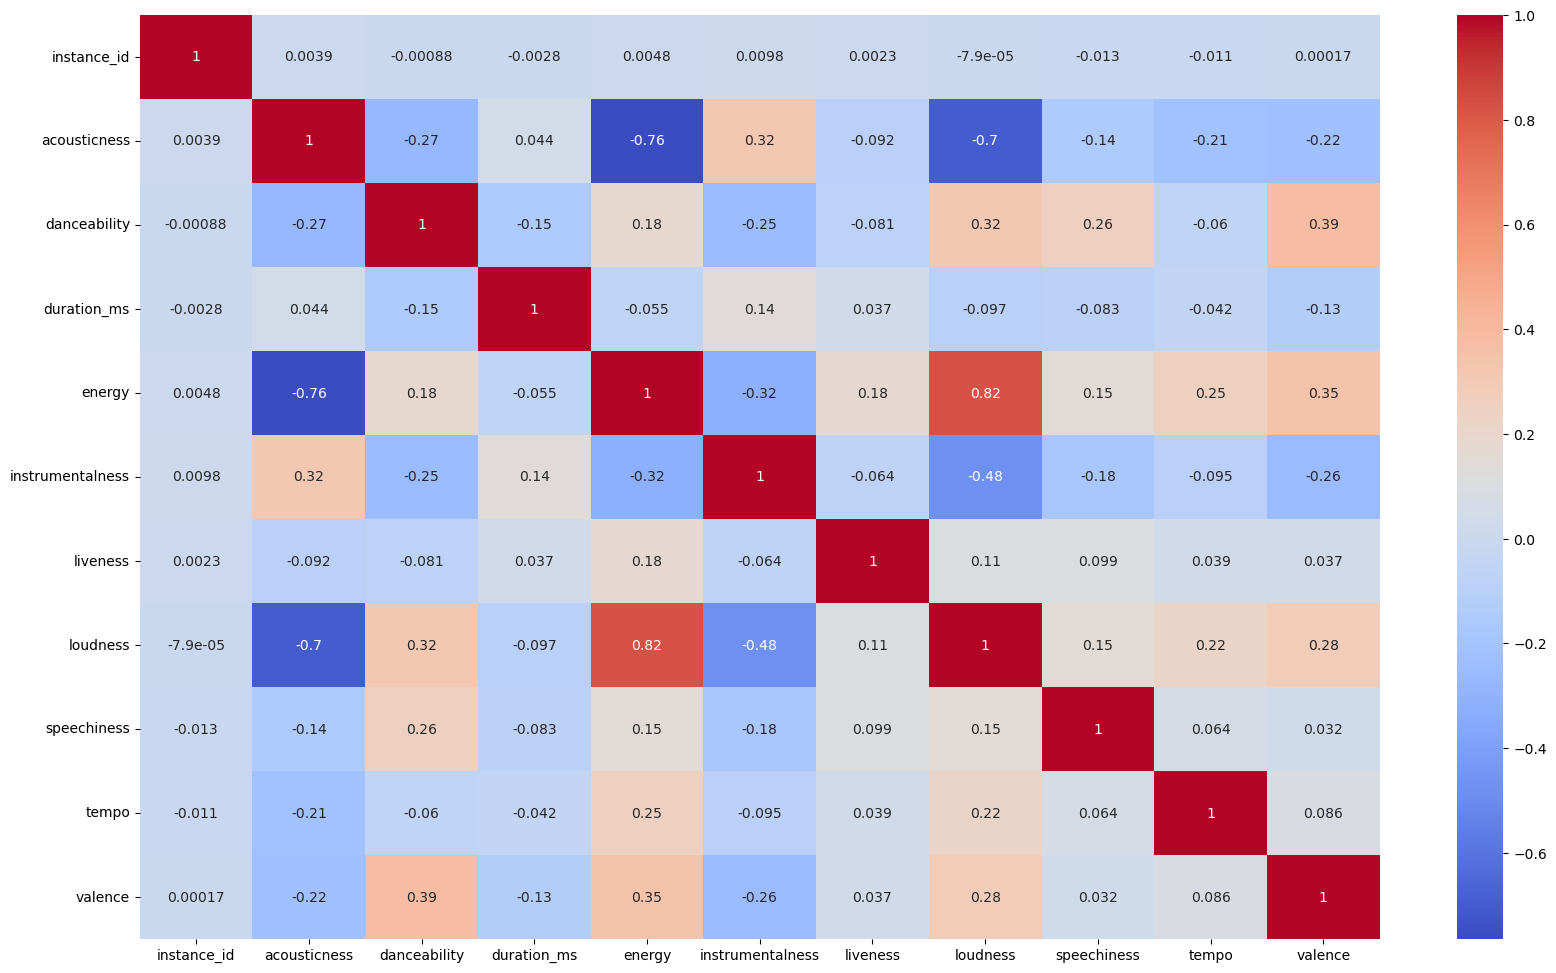

In [39]:
# построим визуальную матрицу корреляции для тренировочного датасета
plt.figure(figsize=(20, 12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm');


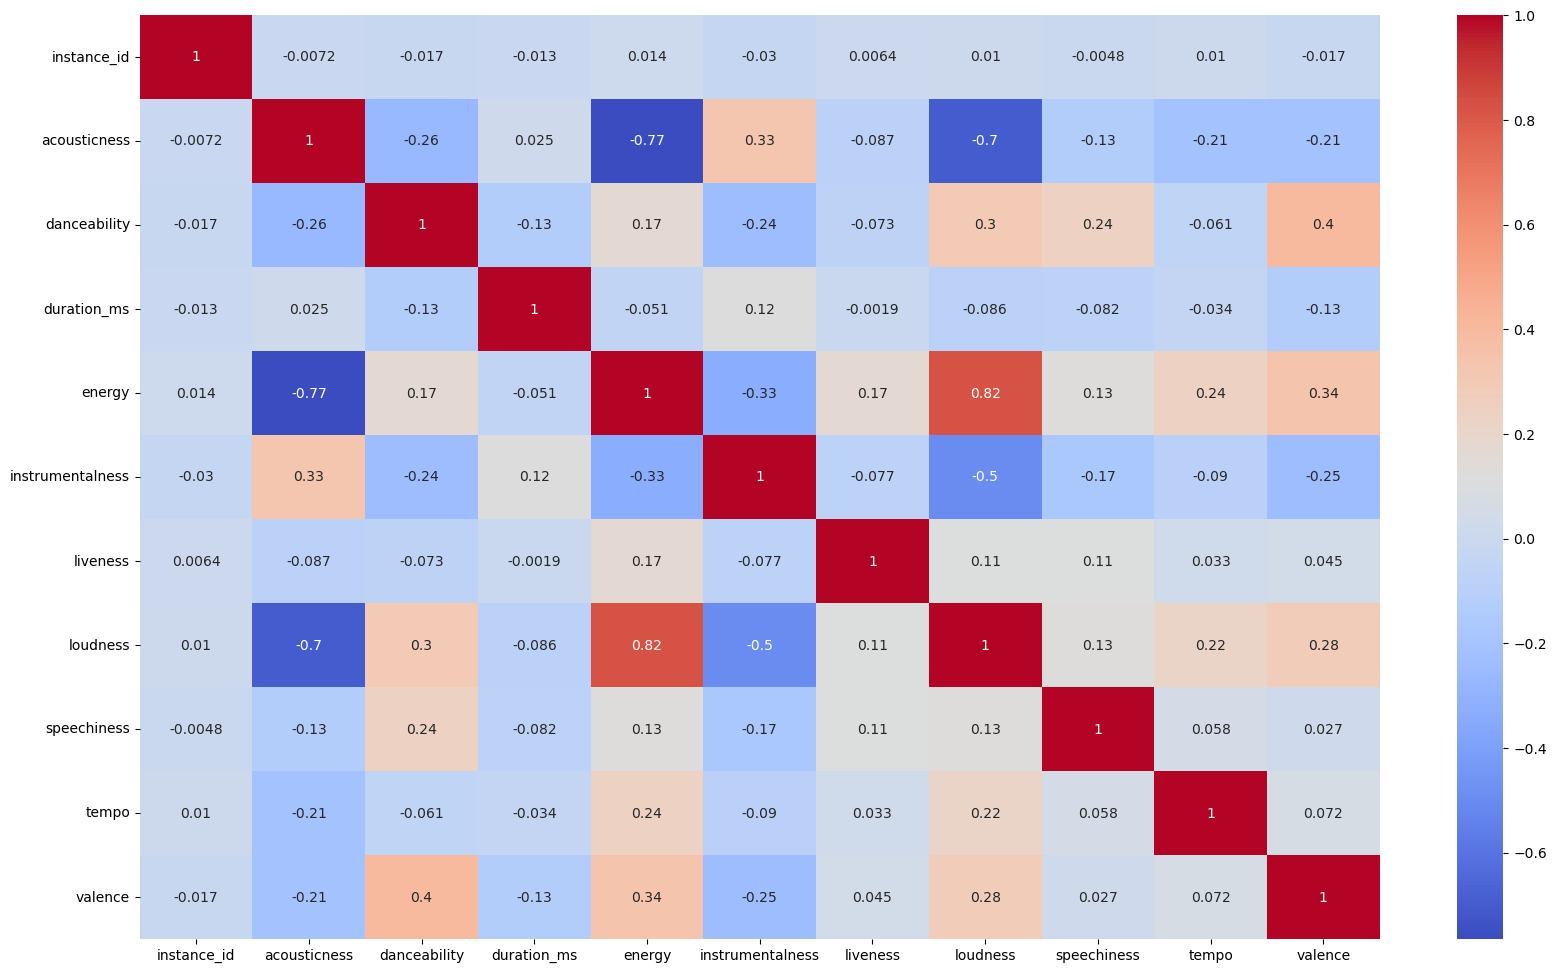

In [40]:
# и для тестового датасета
plt.figure(figsize=(20, 12))
sns.heatmap(test.corr(), annot=True, cmap='coolwarm');